In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/archive.zip')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**EDA**

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<ipython-input-5-24c54dee92d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


Text(0.5, 1.0, 'Sales Distribution Plot')

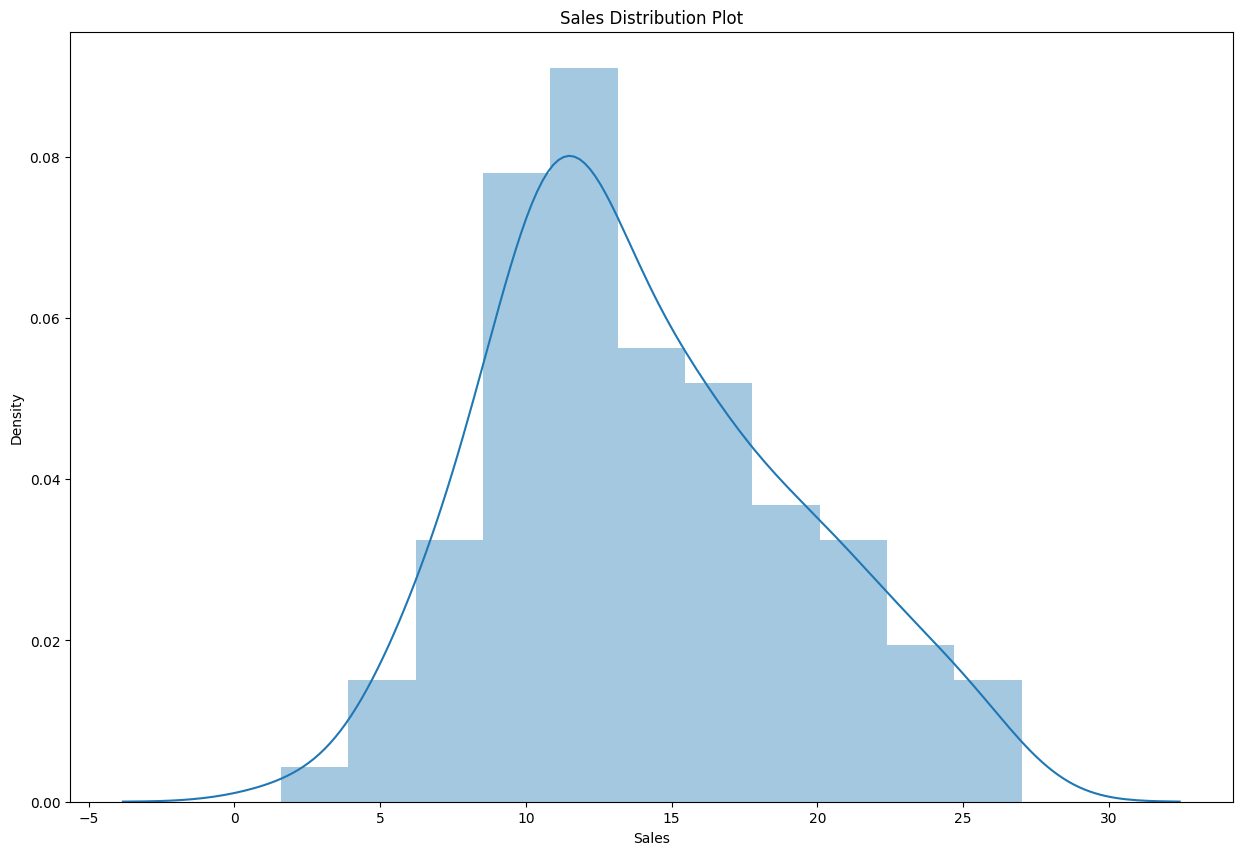

In [ ]:

plt.figure(figsize=[15,10])
sns.distplot(df['Sales'])
plt.title('Sales Distribution Plot')

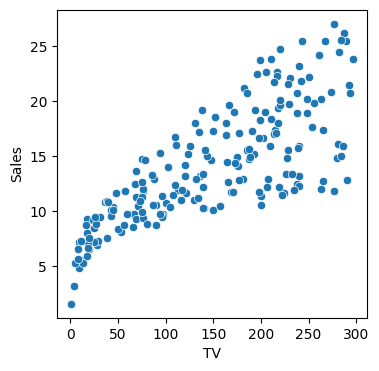

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

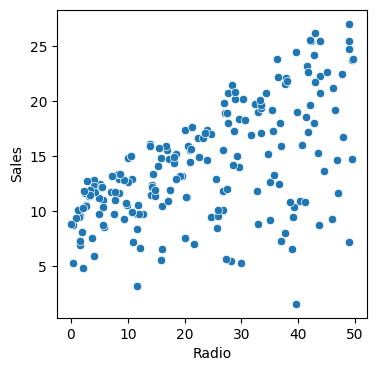

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

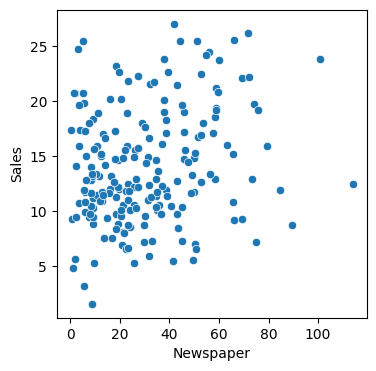

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()


In [ ]:
features = ['TV','Radio','Newspaper']
X = df[features]
y = df.Sales

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**Prediction**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:

model.score(X_test,y_test)

0.8938579492574558

In [ ]:

model.predict(X_test)


array([14.31608213,  8.78978159,  9.99589091, 12.80409435, 18.48690978,
        9.84221098,  9.5489634 ,  8.51697785, 12.80642617, 18.66452215,
        5.35618504,  9.21021337, 11.80094619,  8.28176775,  6.10745025,
       10.52477117, 23.82921308,  6.19002695, 13.92538603, 19.33095961,
       17.91389965, 18.53601213, 13.84660449, 13.53096123, 21.70995542,
       15.80988107, 11.46914055, 12.48236907, 14.37212791, 16.67749212,
       10.13395015, 20.81014317,  6.86042741, 12.85397334, 15.78455559,
       23.33811099,  7.96169432,  4.57903786, 14.11983536, 19.79360361])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:

model2.score(X_test, y_test)

0.9663896758819588

In [ ]:
model2.predict(X_test)

array([14.9,  5.7, 11.3, 10.6, 18. , 10.1, 11.4,  5.7, 10.6, 17.1,  1.6,
       11.4, 10.4,  9.6,  7.6,  7.2, 24.4,  7.6, 11.7, 20.1, 17.2, 15.7,
       13.2, 10.6, 21.4, 11.8, 12. , 14.5, 14.6, 14.8, 11. , 23.2,  7.6,
       14.6, 11.8, 22.2,  9.7,  7.3, 13.4, 17.4])

In [ ]:

from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=30)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
model3.score(X_test, y_test)


0.984803903576441

In [ ]:

print("Linear Regression accuracy: ",model.score(X_test,y_test)*100)
print("Decision Tree accuracy: ",model2.score(X_test,y_test)*100)
print("Random Forest accuracy: ",model3.score(X_test,y_test)*100)

Linear Regression accuracy:  89.38579492574557
Decision Tree accuracy:  96.63896758819588
Random Forest accuracy:  98.4803903576441
